In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("US_Accidents_Cleaned.csv", nrows=200000)
df.head()

,ID,Source,Severity,Start_Lat,Start_Lng,Description,Street,City,County,State,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Weekday,Month
0,A-3,Source2,2,39.063148,-84.032608,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,...,False,True,False,Night,Night,Day,Day,6,Monday,February
1,A-14,Source2,2,39.790760,-84.241547,Accident on Salem Ave at Hillcrest Ave / Kensi...,Salem Ave,Dayton,Montgomery,OH,...,False,True,False,Day,Day,Day,Day,8,Monday,February
2,A-18,Source2,2,39.752174,-84.239952,Accident on Delphos Ave at Brooklyn Ave. Expec...,Delphos Ave,Dayton,Montgomery,OH,...,False,False,False,Day,Day,Day,Day,9,Monday,February
3,A-20,Source2,2,39.790703,-84.244461,Accident on Hillcrest Ave at Piccadilly Ave. E...,W Hillcrest Ave,Dayton,Montgomery,OH,...,False,False,False,Day,Day,Day,Day,9,Monday,February
4,A-22,Source2,2,39.773346,-84.224686,Accident on Princeton Dr at Catalpa Dr. Expect...,Princeton Dr,Dayton,Montgomery,OH,...,False,False,False,Day,Day,Day,Day,10,Monday,February


In [3]:
cols = [
    "Severity",
    "Visibility(mi)",
    "Temperature(F)",
    "Humidity(%)",
    "Pressure(in)",
    "Wind_Speed(mph)"
]

df_corr = df[cols].dropna()

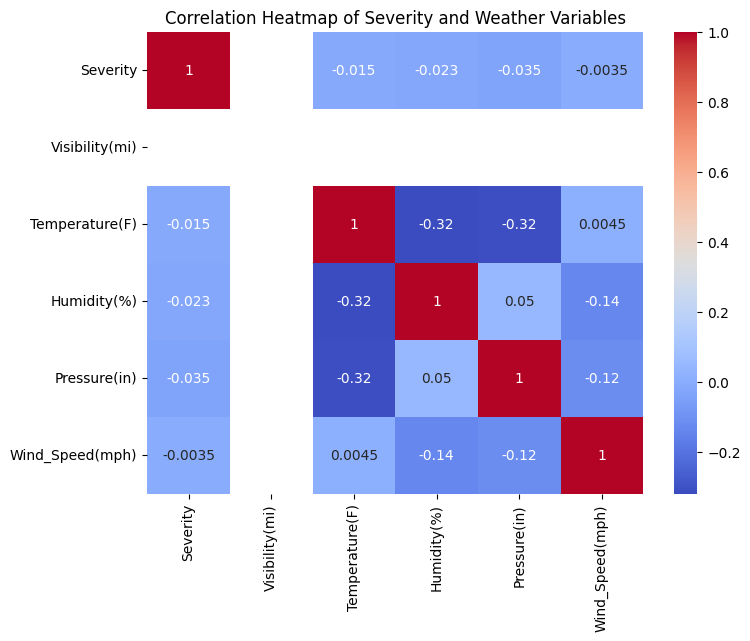

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Severity and Weather Variables")
plt.show()

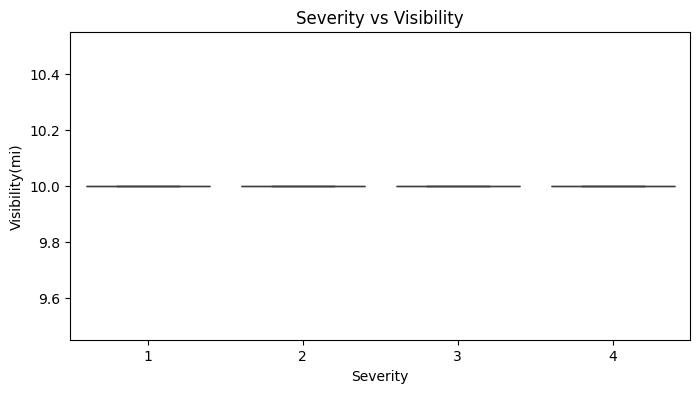

In [5]:
plt.figure(figsize=(8,4))
sns.boxplot(x="Severity", y="Visibility(mi)", data=df)
plt.title("Severity vs Visibility")
plt.show()

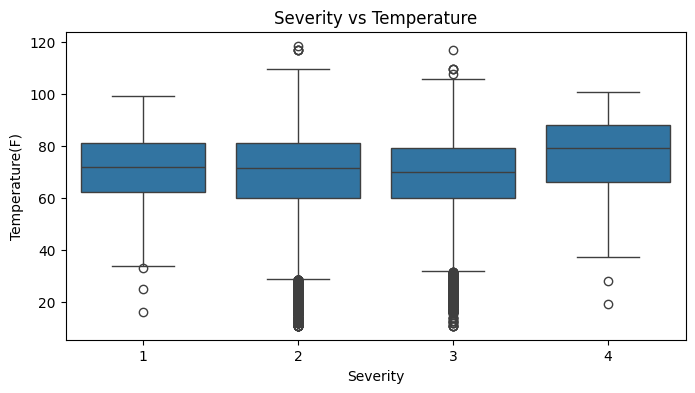

In [6]:
plt.figure(figsize=(8,4))
sns.boxplot(x="Severity", y="Temperature(F)", data=df)
plt.title("Severity vs Temperature")
plt.show()

<Figure size 1000x400 with 0 Axes>

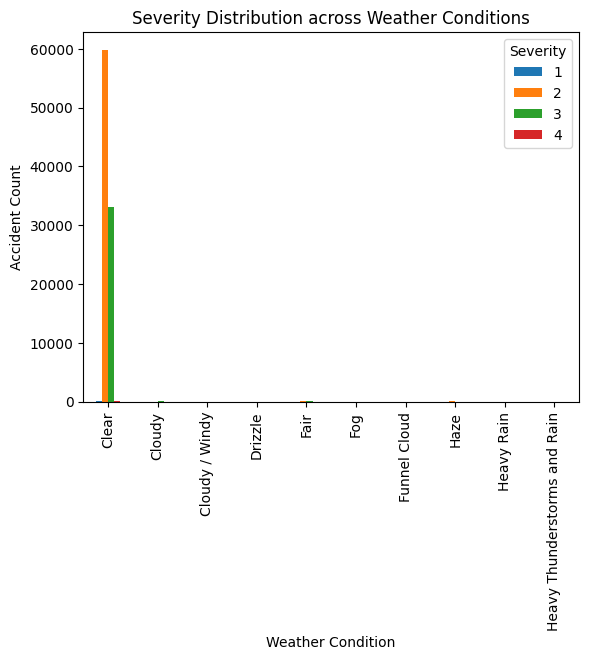

In [7]:
plt.figure(figsize=(10,4))
pd.crosstab(df["Weather_Condition"], df["Severity"]).head(10).plot(kind="bar")
plt.title("Severity Distribution across Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Accident Count")
plt.show()

<Figure size 600x400 with 0 Axes>

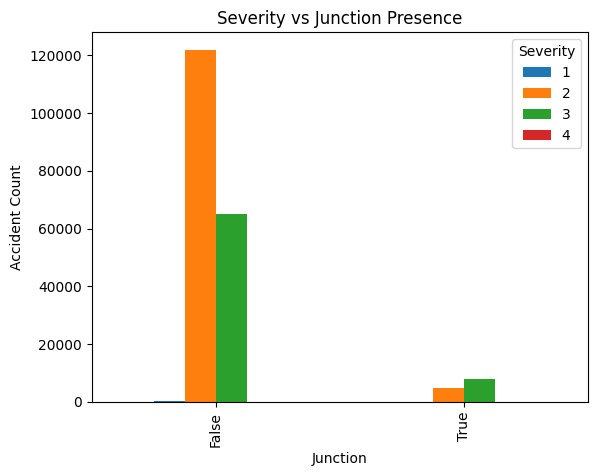

In [8]:
plt.figure(figsize=(6,4))
pd.crosstab(df["Junction"], df["Severity"]).plot(kind="bar")
plt.title("Severity vs Junction Presence")
plt.xlabel("Junction")
plt.ylabel("Accident Count")
plt.show()

<Figure size 600x400 with 0 Axes>

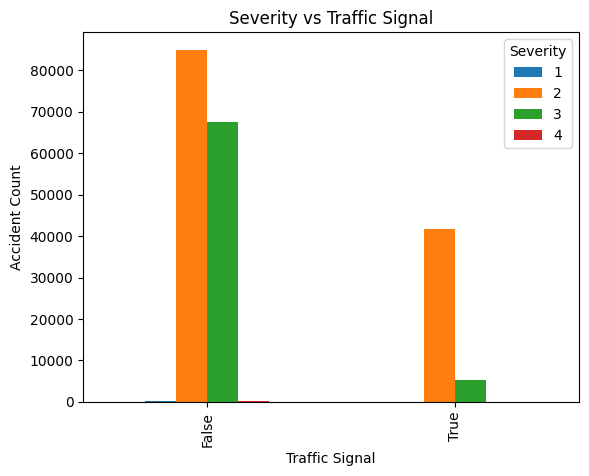

In [9]:
plt.figure(figsize=(6,4))
pd.crosstab(df["Traffic_Signal"], df["Severity"]).plot(kind="bar")
plt.title("Severity vs Traffic Signal")
plt.xlabel("Traffic Signal")
plt.ylabel("Accident Count")
plt.show()

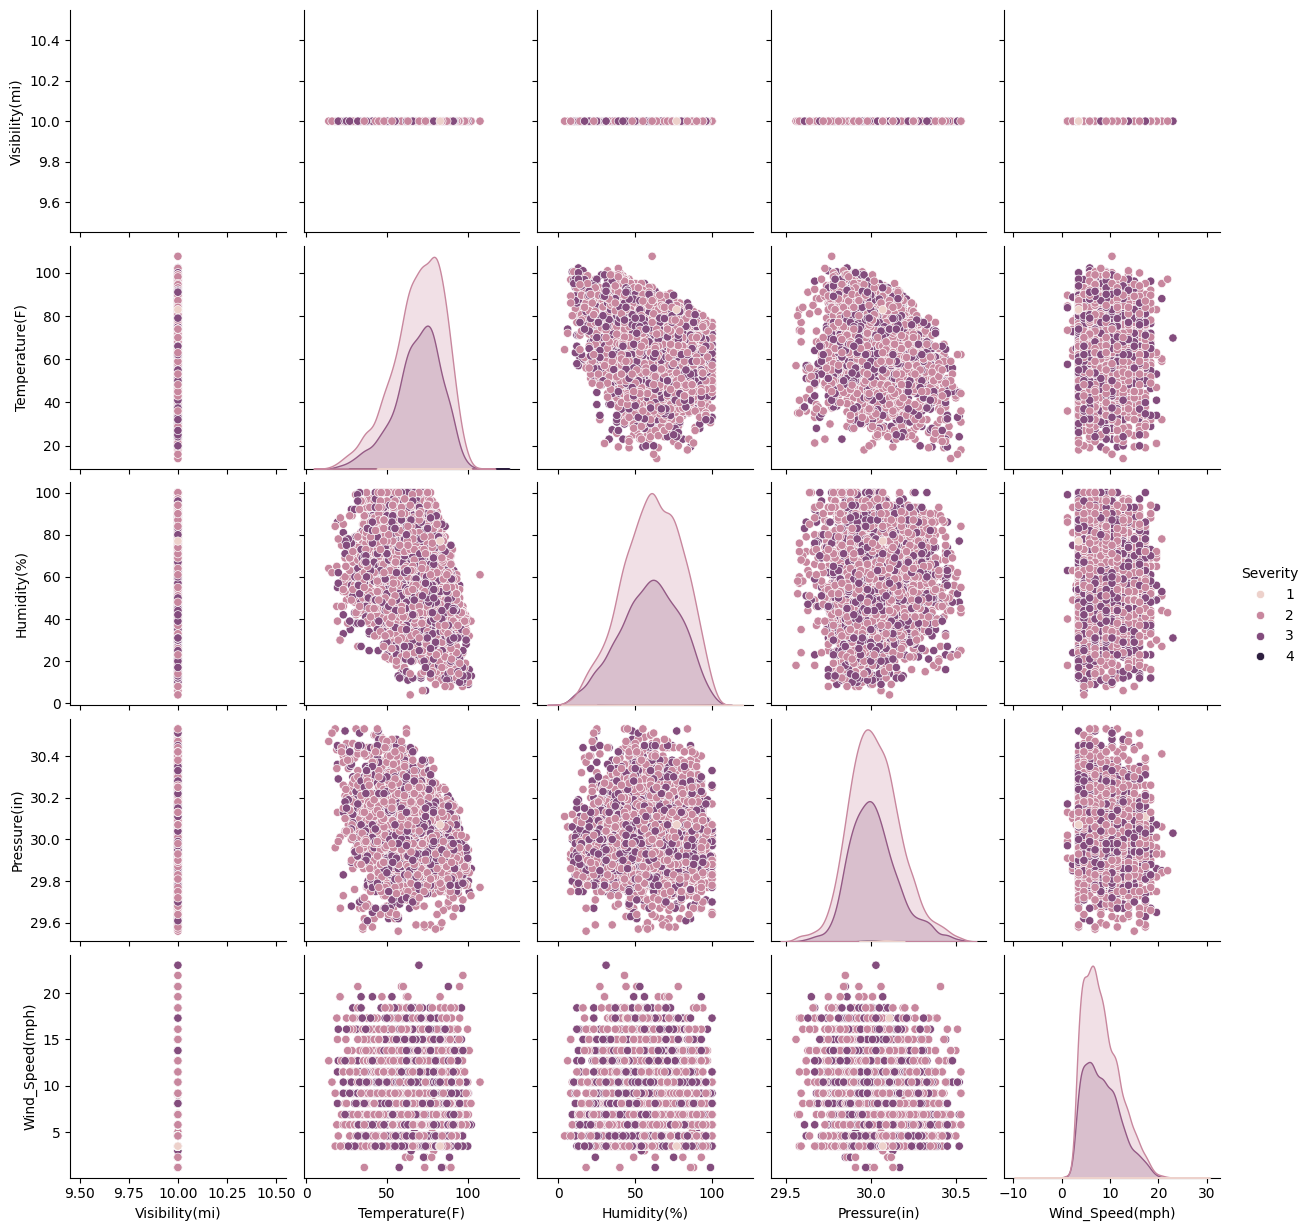

In [10]:
sns.pairplot(
    df_corr.sample(5000),
    hue="Severity",
    diag_kind="kde"
)
plt.show()